In [1]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir('./')

['.ipynb_checkpoints',
 'alldata_newfeats.csv',
 'application_test.csv',
 'application_train.csv',
 'GenNewMiniTrain.ipynb',
 'importance_lgb10.csv',
 'importance_lgb8.csv',
 'Train_FeatSelect.csv',
 'train_mini.csv',
 'train_mini2.csv']

### 1.  'alldata_newfeats.csv'

In [3]:
alldata_newfeats = pd.read_csv('alldata_newfeats.csv',index_col=0)
alldata_newfeats.head()

,EXT_SOURCE_1over2_NAminus1_Add0.1,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EXT_SOURCE_3over1_NAminus1_Add0.1,EXT_SOURCE_2over3_NAminus1_Add0.1,EXT_SOURCE_3over2_NAminus1_Add0.1,EXT_SOURCE_na1_2,EXT_SOURCE_na1_3,EXT_SOURCE_na2_1,EXT_SOURCE_na2_3,...,AVG_CREDITDAYS_PROLONGED,NO_LOANS,TOTAL_INSTALMENTS,CREDIT_LOAD,DPD_COUNT,AVG_DPD,PERCENTAGE_MISSED_PAYMENTS,CASH_CARD_RATIO,DRAWINGS_RATIO,NULLCOUNT
0,0.504305,1.982925,0.764643,1.307800,1.516229,0.659531,0.000000,0.000000,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,0.569428,1.756147,-0.456964,-2.188358,-0.802495,-1.246113,0.000000,0.000000,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,-1.372135,-0.728791,-1.084904,-0.921741,0.790668,1.264753,0.555912,0.729567,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,-1.199294,-0.833824,1.000000,1.000000,-0.833824,-1.199294,0.650442,0.000000,0.0,0.0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,40
4,-2.128977,-0.469709,1.000000,1.000000,-0.469709,-2.128977,0.322738,0.000000,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [4]:
importance_lgb10 = pd.read_csv('importance_lgb10.csv',index_col=0)
importance_lgb10.head()

,importance
feature,
LOAN_RATE,2220
EXT_SOURCE_SUM,852
BUREAU_DAYS_CREDIT_ENDDATE_max,795
EXT_SOURCE_3over2_NAminus1_Add0.1,781
CREDIT_INCOME_RATIO,771


In [5]:
importance_cum = importance_lgb10.importance/importance_lgb10.importance.sum()
importance_cum = importance_cum.cumsum()
importance_cum.head()

feature
LOAN_RATE                            0.026306
EXT_SOURCE_SUM                       0.036402
BUREAU_DAYS_CREDIT_ENDDATE_max       0.045823
EXT_SOURCE_3over2_NAminus1_Add0.1    0.055078
CREDIT_INCOME_RATIO                  0.064214
Name: importance, dtype: float64

In [6]:
features_keep = importance_cum[importance_cum<0.9].index.tolist()
len(features_keep)

150

In [7]:
df_1 = alldata_newfeats[features_keep]
df_1.head()

,LOAN_RATE,EXT_SOURCE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_max,EXT_SOURCE_3over2_NAminus1_Add0.1,CREDIT_INCOME_RATIO,EXT_SOURCE_MEAN,EXT_SOURCE_2over3_NAminus1_Add0.1,BUREAU_DAYS_CREDIT_max,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,...,PREVIOUS_HOUR_APPR_PROCESS_START_min,EXT_SOURCE_na3_2,PREVIOUS_NAME_YIELD_GROUP_low_normal_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Active_mean_min,PREVIOUS_NAME_CONTRACT_STATUS_Approved_mean,PREVIOUS_NAME_CLIENT_TYPE_Refreshed_mean,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_max_mean,PREVIOUS_AMT_CREDIT_min,PREVIOUS_NAME_TYPE_SUITE_Unaccompanied_mean,PREVIOUS_NAME_PORTFOLIO_Cash_mean
0,0.060749,0.485361,780.0,0.659531,2.007889,0.161787,1.516229,-103.0,1.982925,0.764643,...,9.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,179055.0,0.000000,0.000000
1,0.027598,0.933513,1216.0,-1.246113,4.790750,0.466757,-0.802495,-606.0,1.756147,-0.456964,...,12.0,0.622246,0.333333,0.875000,1.000000,0.666667,0.0,68053.5,0.333333,0.333333
2,0.050000,1.285479,-382.0,1.264753,2.000000,0.642739,0.790668,-408.0,-0.728791,-1.084904,...,5.0,0.000000,0.000000,0.750000,1.000000,0.000000,0.0,20106.0,1.000000,0.000000
3,0.094941,0.650442,NaN,-1.199294,2.316167,0.650442,-0.833824,NaN,-0.833824,1.000000,...,12.0,0.650442,0.222222,0.666667,0.555556,0.000000,0.0,0.0,0.333333,0.333333
4,0.042623,0.322738,-783.0,-2.128977,4.222222,0.322738,-0.469709,-1149.0,-0.469709,1.000000,...,8.0,0.322738,0.000000,0.846154,1.000000,0.000000,0.0,14616.0,0.333333,0.666667


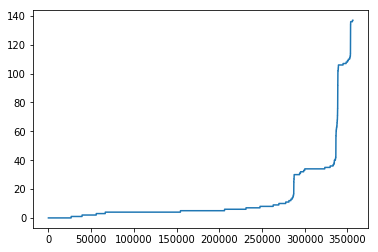

In [8]:
df_1.isnull().sum(axis=1).sort_values().reset_index(drop=True).plot()

In [26]:
def nullcat(i):
    if i<17:
        return i//2
    elif i<25:
        return 9
    elif i<30:
        return 10
    elif i<85:
        return 11
    else:
        return 12

In [9]:
df_1['null_count'] = df_1.isnull().sum(axis=1)
df_1.head()

D:\SoftWares\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,LOAN_RATE,EXT_SOURCE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_max,EXT_SOURCE_3over2_NAminus1_Add0.1,CREDIT_INCOME_RATIO,EXT_SOURCE_MEAN,EXT_SOURCE_2over3_NAminus1_Add0.1,BUREAU_DAYS_CREDIT_max,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,...,EXT_SOURCE_na3_2,PREVIOUS_NAME_YIELD_GROUP_low_normal_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Active_mean_min,PREVIOUS_NAME_CONTRACT_STATUS_Approved_mean,PREVIOUS_NAME_CLIENT_TYPE_Refreshed_mean,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_max_mean,PREVIOUS_AMT_CREDIT_min,PREVIOUS_NAME_TYPE_SUITE_Unaccompanied_mean,PREVIOUS_NAME_PORTFOLIO_Cash_mean,null_count
0,0.060749,0.485361,780.0,0.659531,2.007889,0.161787,1.516229,-103.0,1.982925,0.764643,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,179055.0,0.000000,0.000000,4
1,0.027598,0.933513,1216.0,-1.246113,4.790750,0.466757,-0.802495,-606.0,1.756147,-0.456964,...,0.622246,0.333333,0.875000,1.000000,0.666667,0.0,68053.5,0.333333,0.333333,4
2,0.050000,1.285479,-382.0,1.264753,2.000000,0.642739,0.790668,-408.0,-0.728791,-1.084904,...,0.000000,0.000000,0.750000,1.000000,0.000000,0.0,20106.0,1.000000,0.000000,5
3,0.094941,0.650442,NaN,-1.199294,2.316167,0.650442,-0.833824,NaN,-0.833824,1.000000,...,0.650442,0.222222,0.666667,0.555556,0.000000,0.0,0.0,0.333333,0.333333,32
4,0.042623,0.322738,-783.0,-2.128977,4.222222,0.322738,-0.469709,-1149.0,-0.469709,1.000000,...,0.322738,0.000000,0.846154,1.000000,0.000000,0.0,14616.0,0.333333,0.666667,5


In [27]:
df_1['null_count_cat'] = df_1['null_count'].apply(nullcat)
df_1['null_count_cat'] = df_1['null_count_cat'].astype('category')
df_1.head()

D:\SoftWares\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\SoftWares\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LOAN_RATE,EXT_SOURCE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_max,EXT_SOURCE_3over2_NAminus1_Add0.1,CREDIT_INCOME_RATIO,EXT_SOURCE_MEAN,EXT_SOURCE_2over3_NAminus1_Add0.1,BUREAU_DAYS_CREDIT_max,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,...,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_sum,PREVIOUS_LOAN_RATE_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_mean,PREVIOUS_AMT_DOWN_PAYMENT_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Completed_mean_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_max_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_min,null_count,null_count_cat
0,0.060749,0.485361,780.0,0.659531,2.007889,0.161787,1.516229,-103.0,1.982925,0.764643,...,24.000000,24.0,0.051670,24.0,0.00,0.000000,19.0,456.0,2,1
1,0.027598,0.933513,1216.0,-1.246113,4.790750,0.466757,-0.802495,-606.0,1.756147,-0.456964,...,8.333333,25.0,0.379150,10.0,0.00,0.083333,12.0,48.0,2,1
2,0.050000,1.285479,-382.0,1.264753,2.000000,0.642739,0.790668,-408.0,-0.728791,-1.084904,...,3.000000,3.0,0.266450,4.0,4860.00,0.250000,3.0,15.0,3,1
3,0.094941,0.650442,NaN,-1.199294,2.316167,0.650442,-0.833824,NaN,-0.833824,1.000000,...,6.000000,18.0,0.415823,24.0,2693.34,0.152778,10.0,50.0,25,10
4,0.042623,0.322738,-783.0,-2.128977,4.222222,0.322738,-0.469709,-1149.0,-0.469709,1.000000,...,15.000000,75.0,0.543953,15.2,3105.00,0.041880,17.0,100.0,3,1


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 356254
Columns: 151 entries, LOAN_RATE to null_count
dtypes: float64(150), int64(1)
memory usage: 413.1 MB


In [11]:
gc.enable()
del alldata_newfeats
gc.collect()

7

### 2. 'Train_FeatSelect.csv'

In [12]:
Train_FeatSelect = pd.read_csv('Train_FeatSelect.csv',index_col=0)
Train_FeatSelect.head()

,last_50_instalment_paid_late_in_days_skew_x,WALLSMATERIAL_MODE,50_period_trend_instalment_paid_over_amount,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_ELEVATORS_AVG,OCCUPATION_TYPE_mean_EXT_SOURCE_1_abs_diff,instalment_paid_over_amount_mean,OCCUPATION_TYPE,last_5_instalment_paid_late_in_days_max_y,CODE_GENDER_NAME_EDUCATION_TYPE_max_OWN_CAR_AGE_abs_diff,OCCUPATION_TYPE_mean_CNT_FAM_MEMBERS_abs_diff,...,i22,i473,i17,i9,i219,i413,NULLCOUNT,SK_ID_CURR,TARGET,NULLCOUNT_Cat
0,-0.304352,"Stone, brick",0.000000,0.070964,0.340268,0.000000,Laborers,-12.0,NaN,1.274479,...,1.000000,2.391086e-01,1.000000,0.860917,0.015672,0.002382,44,100002,1.0,0
1,-0.354787,Block,0.000000,0.102038,0.200145,0.000000,Core staff,-3.0,NaN,0.307945,...,-0.999394,-2.262885e-01,-0.999881,-0.999617,-0.000488,0.055334,36,100003,0.0,0
2,0.528005,NaN,0.000000,0.070964,NaN,0.000000,Laborers,-3.0,65.0,1.274479,...,0.770454,-8.000064e-08,0.998608,-0.999726,-0.065754,-0.109869,101,100004,0.0,2
3,-1.461841,NaN,0.000000,0.070964,NaN,0.000000,Laborers,-1.0,NaN,0.274479,...,-0.658942,-8.000064e-08,-0.777401,0.349752,-0.020672,0.220543,152,100006,0.0,3
4,-1.882704,NaN,-47.553344,0.040872,NaN,-452.384318,Core staff,0.0,NaN,1.307945,...,0.323654,-8.000064e-08,-0.199654,-0.855524,0.053902,0.174868,93,100007,0.0,1


In [13]:
importance_lgb8 = pd.read_csv('importance_lgb8.csv',index_col=0)
importance_lgb8.head()

,importance
feature,
ORGANIZATION_TYPE,1349
CREDIT_TERM_sy,553
NEW_CREDIT_TO_ANNUITY_RATIO,535
OCCUPATION_TYPE,513
AMT_GOODS_PRICE,355


In [14]:
importance_cum = importance_lgb8.importance/importance_lgb8.importance.sum()
importance_cum = importance_cum.cumsum()
importance_cum.head()

feature
ORGANIZATION_TYPE              0.017918
CREDIT_TERM_sy                 0.025264
NEW_CREDIT_TO_ANNUITY_RATIO    0.032370
OCCUPATION_TYPE                0.039184
AMT_GOODS_PRICE                0.043899
Name: importance, dtype: float64

In [15]:
features_keep = importance_cum[importance_cum<0.98].index.tolist()
len(features_keep)

570

In [16]:
df_2 = Train_FeatSelect[features_keep]
df_2.head()

,ORGANIZATION_TYPE,CREDIT_TERM_sy,NEW_CREDIT_TO_ANNUITY_RATIO,OCCUPATION_TYPE,AMT_GOODS_PRICE,bureau_debt_credit_ratio,NEW_CREDIT_TO_GOODS_RATIO,i9,DAYS_CREDIT_max,i19,...,bureau_credit_type_credit_card_mean,instalment_paid_over_amount_std,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_BASEMENTAREA_AVG_abs_diff,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_YEARS_BUILD_AVG,HOUSE_VALUE_sy,CREDIT_TERM_traintest_max,last_1500_bureau_credit_type_credit_card_sum,CountMaxMonth_bureau_minus_std,AMT_ANNUITY_max_traintest,OCCUPATION_TYPE_mean_CNT_CHILDREN_diff
0,Business Entity Type 3,0.060749,16.461104,Laborers,351000.0,0.284122,1.158397,0.860917,-103.0,0.479380,...,0.5,0.000000,0.047783,0.744878,-29.432276,0.0,4.0,10.783585,0.0,-0.508122
1,School,0.027598,36.234085,Core staff,1129500.0,0.000000,1.145199,-0.999617,-606.0,-0.999869,...,0.5,0.000000,0.041213,0.769317,-23.038326,NaN,1.0,NaN,NaN,-0.552817
2,Government,0.050000,20.000000,Laborers,135000.0,0.000000,1.000000,-0.999726,-408.0,-0.999513,...,0.0,0.000000,NaN,0.744878,NaN,NaN,0.0,NaN,NaN,-0.508122
3,Business Entity Type 3,0.094941,10.532818,Laborers,297000.0,NaN,1.052803,0.349752,NaN,-0.993182,...,NaN,0.000000,NaN,0.744878,NaN,NaN,NaN,NaN,NaN,-0.508122
4,Religion,0.042623,23.461618,Core staff,513000.0,0.000000,1.000000,-0.855524,-1149.0,-0.226757,...,0.0,2843.383508,NaN,0.748113,NaN,NaN,0.0,NaN,NaN,-0.552817


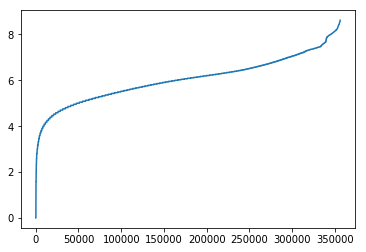

In [17]:
df_2.isnull().sum(axis=1).sort_values().reset_index(drop=True).apply(lambda x:np.log2(x)).plot()

In [18]:
df_2['null_count_2'] = df_2.isnull().sum(axis=1)
df_2.head()

D:\SoftWares\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ORGANIZATION_TYPE,CREDIT_TERM_sy,NEW_CREDIT_TO_ANNUITY_RATIO,OCCUPATION_TYPE,AMT_GOODS_PRICE,bureau_debt_credit_ratio,NEW_CREDIT_TO_GOODS_RATIO,i9,DAYS_CREDIT_max,i19,...,instalment_paid_over_amount_std,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_BASEMENTAREA_AVG_abs_diff,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_YEARS_BUILD_AVG,HOUSE_VALUE_sy,CREDIT_TERM_traintest_max,last_1500_bureau_credit_type_credit_card_sum,CountMaxMonth_bureau_minus_std,AMT_ANNUITY_max_traintest,OCCUPATION_TYPE_mean_CNT_CHILDREN_diff,null_count_2
0,Business Entity Type 3,0.060749,16.461104,Laborers,351000.0,0.284122,1.158397,0.860917,-103.0,0.479380,...,0.000000,0.047783,0.744878,-29.432276,0.0,4.0,10.783585,0.0,-0.508122,43
1,School,0.027598,36.234085,Core staff,1129500.0,0.000000,1.145199,-0.999617,-606.0,-0.999869,...,0.000000,0.041213,0.769317,-23.038326,NaN,1.0,NaN,NaN,-0.552817,31
2,Government,0.050000,20.000000,Laborers,135000.0,0.000000,1.000000,-0.999726,-408.0,-0.999513,...,0.000000,NaN,0.744878,NaN,NaN,0.0,NaN,NaN,-0.508122,91
3,Business Entity Type 3,0.094941,10.532818,Laborers,297000.0,NaN,1.052803,0.349752,NaN,-0.993182,...,0.000000,NaN,0.744878,NaN,NaN,NaN,NaN,NaN,-0.508122,140
4,Religion,0.042623,23.461618,Core staff,513000.0,0.000000,1.000000,-0.855524,-1149.0,-0.226757,...,2843.383508,NaN,0.748113,NaN,NaN,0.0,NaN,NaN,-0.552817,82


In [47]:
df_2['null_count_cat_2'] = df_2['null_count_2'].apply(lambda x:int(np.log2(x+1)))
df_2['null_count_cat_2'] = df_2['null_count_cat_2'].astype('object')
df_2.head()

D:\SoftWares\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\SoftWares\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ORGANIZATION_TYPE,CREDIT_TERM_sy,NEW_CREDIT_TO_ANNUITY_RATIO,OCCUPATION_TYPE,AMT_GOODS_PRICE,bureau_debt_credit_ratio,NEW_CREDIT_TO_GOODS_RATIO,i9,DAYS_CREDIT_max,i19,...,NumFeats66,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_APARTMENTS_AVG_diff,Iter5,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_ELEVATORS_AVG_diff,AMT_PAYMENT_minus_min_std,NumFeats58,CREDIT_ENDDATE_PERCENTAGE_new,AMT_REQ_CREDIT_BUREAU_QRT,null_count_2,null_count_cat_2
0,Business Entity Type 3,0.060749,16.461104,Laborers,351000.0,0.284122,1.158397,0.860917,-103.0,0.479380,...,4140.0,-0.085743,74,-0.070964,NaN,5106.0,0.625,0.0,43,5
1,School,0.027598,36.234085,Core staff,1129500.0,0.000000,1.145199,-0.999617,-606.0,-0.999869,...,4896.0,-0.032803,73,-0.022038,0.000000,7446.0,0.250,0.0,26,4
2,Government,0.050000,20.000000,Laborers,135000.0,0.000000,1.000000,-0.999726,-408.0,-0.999513,...,2010.0,NaN,58,NaN,NaN,3886.0,0.000,0.0,81,6
3,Business Entity Type 3,0.094941,10.532818,Laborers,297000.0,NaN,1.052803,0.349752,NaN,-0.993182,...,4500.0,NaN,48,NaN,0.000000,2880.0,NaN,NaN,123,6
4,Religion,0.042623,23.461618,Core staff,513000.0,0.000000,1.000000,-0.855524,-1149.0,-0.226757,...,4959.0,NaN,40,NaN,9853.583977,3480.0,0.000,0.0,71,6


In [20]:
intercols = list(set(df_1.columns.tolist())&set(df_2.columns.tolist()))
intercols

['AVG_ENDDATE_FUTURE', 'AVERAGE_LOAN_TYPE', 'EXT_SOURCE_MEAN']

In [21]:
df_1.drop(intercols,axis=1,inplace=True)

In [22]:
df_1.shape[0]==df_2.shape[0]

True

In [23]:
df_all = pd.concat([df_1,df_2],axis=1)
df_all.head()

,LOAN_RATE,EXT_SOURCE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_max,EXT_SOURCE_3over2_NAminus1_Add0.1,CREDIT_INCOME_RATIO,EXT_SOURCE_2over3_NAminus1_Add0.1,BUREAU_DAYS_CREDIT_max,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EMPLOYED_BIRTH_RATIO,...,instalment_paid_over_amount_std,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_BASEMENTAREA_AVG_abs_diff,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_YEARS_BUILD_AVG,HOUSE_VALUE_sy,CREDIT_TERM_traintest_max,last_1500_bureau_credit_type_credit_card_sum,CountMaxMonth_bureau_minus_std,AMT_ANNUITY_max_traintest,OCCUPATION_TYPE_mean_CNT_CHILDREN_diff,null_count_2
0,0.060749,0.485361,780.0,0.659531,2.007889,1.516229,-103.0,1.982925,0.764643,0.067329,...,0.000000,0.047783,0.744878,-29.432276,0.0,4.0,10.783585,0.0,-0.508122,43
1,0.027598,0.933513,1216.0,-1.246113,4.790750,-0.802495,-606.0,1.756147,-0.456964,0.070862,...,0.000000,0.041213,0.769317,-23.038326,NaN,1.0,NaN,NaN,-0.552817,31
2,0.050000,1.285479,-382.0,1.264753,2.000000,0.790668,-408.0,-0.728791,-1.084904,0.011814,...,0.000000,NaN,0.744878,NaN,NaN,0.0,NaN,NaN,-0.508122,91
3,0.094941,0.650442,NaN,-1.199294,2.316167,-0.833824,NaN,-0.833824,1.000000,0.159905,...,0.000000,NaN,0.744878,NaN,NaN,NaN,NaN,NaN,-0.508122,140
4,0.042623,0.322738,-783.0,-2.128977,4.222222,-0.469709,-1149.0,-0.469709,1.000000,0.152418,...,2843.383508,NaN,0.748113,NaN,NaN,0.0,NaN,NaN,-0.552817,82


In [24]:
del df_1,df_2
gc.collect()

0

In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 356254
Columns: 719 entries, LOAN_RATE to null_count_2
dtypes: float64(698), int64(16), object(5)
memory usage: 1.9+ GB


In [26]:
# Create correlation matrix
corr_matrix = df_all.select_dtypes(include='float64').corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [29]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [30]:
len(to_drop)

118

In [31]:
to_drop

['CREDIT_TERM_sy',
 'bureau_debt_credit_ratio',
 'DAYS_CREDIT_max',
 'AMT_CREDIT_MAX_OVERDUE_mean',
 'AMT_ANNUITY_div_AMT_GOODS_PRICE',
 'bureau_SK_ID_CURR_max_DAYS_CREDIT_ENDDATE',
 'DAYS_EMPLOYED',
 'AMT_CREDIT_SUM_min',
 'AMT_CREDIT_SUM_max',
 'AMT_ANNUITY_mean_prevapp',
 'AMT_INSTALMENT_min_mean',
 'days_employed_percentage',
 'CNT_INSTALMENT_FUTURE_mean_max',
 'DAYS_ENDDATE_FACT_max',
 '10_period_trend_instalment_paid_late_in_days',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'CNT_INSTALMENT_FUTURE_min_mean',
 'ACTIVE_AMT_CREDIT_SUM_SUM',
 'AMT_APPLICATION_minus_CREDIT_sum',
 'bureau_total_customer_credit',
 'AMT_CREDIT_div_DAYS_CREDIT_max',
 'AMT_CREDIT_SUM_DEBT_mean',
 'AMT_CREDIT_mean',
 'CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_1_diff',
 'AMT_CREDIT_SUM_DEBT_max',
 'INSTAL_AMT_PAYMENT_SUM',
 'DAYS_CREDIT_mean',
 'CNT_INSTALMENT_FUTURE_min_max',
 'EXT_SOURCE_MEAN',
 'external_sources_weighted',
 'OCCUPATION_TYPE_mean_DAYS_EMPLOYED_diff',
 'HOUR_A

In [32]:
df_all.drop(list(set(df_all.columns.tolist())&set(to_drop)),axis=1,inplace=True)
df_all.head()

,LOAN_RATE,EXT_SOURCE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_max,EXT_SOURCE_3over2_NAminus1_Add0.1,CREDIT_INCOME_RATIO,EXT_SOURCE_2over3_NAminus1_Add0.1,BUREAU_DAYS_CREDIT_max,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EMPLOYED_BIRTH_RATIO,...,YEARS_BUILD_MERGE,NumFeats75,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_BASEMENTAREA_AVG_abs_diff,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_YEARS_BUILD_AVG,HOUSE_VALUE_sy,CREDIT_TERM_traintest_max,last_1500_bureau_credit_type_credit_card_sum,AMT_ANNUITY_max_traintest,OCCUPATION_TYPE_mean_CNT_CHILDREN_diff,null_count_2
0,0.060749,0.485361,780.0,0.659531,2.007889,1.516229,-103.0,1.982925,0.764643,0.067329,...,0.625867,3600.0,0.047783,0.744878,-29.432276,0.0,4.0,0.0,-0.508122,43
1,0.027598,0.933513,1216.0,-1.246113,4.790750,-0.802495,-606.0,1.756147,-0.456964,0.070862,...,0.799567,2304.0,0.041213,0.769317,-23.038326,NaN,1.0,NaN,-0.552817,31
2,0.050000,1.285479,-382.0,1.264753,2.000000,0.790668,-408.0,-0.728791,-1.084904,0.011814,...,NaN,900.0,NaN,0.744878,NaN,NaN,0.0,NaN,-0.508122,91
3,0.094941,0.650442,NaN,-1.199294,2.316167,-0.833824,NaN,-0.833824,1.000000,0.159905,...,NaN,5625.0,NaN,0.744878,NaN,NaN,NaN,NaN,-0.508122,140
4,0.042623,0.322738,-783.0,-2.128977,4.222222,-0.469709,-1149.0,-0.469709,1.000000,0.152418,...,NaN,3249.0,NaN,0.748113,NaN,NaN,0.0,NaN,-0.552817,82


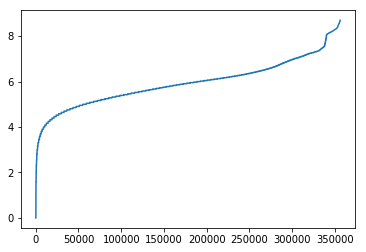

In [33]:
df_all.isnull().sum(axis=1).sort_values().reset_index(drop=True).apply(lambda x:np.log2(x)).plot()

In [34]:
df_all['null_count_3'] = df_all.isnull().sum(axis=1)
df_all.head()

,LOAN_RATE,EXT_SOURCE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_max,EXT_SOURCE_3over2_NAminus1_Add0.1,CREDIT_INCOME_RATIO,EXT_SOURCE_2over3_NAminus1_Add0.1,BUREAU_DAYS_CREDIT_max,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EMPLOYED_BIRTH_RATIO,...,NumFeats75,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_BASEMENTAREA_AVG_abs_diff,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_YEARS_BUILD_AVG,HOUSE_VALUE_sy,CREDIT_TERM_traintest_max,last_1500_bureau_credit_type_credit_card_sum,AMT_ANNUITY_max_traintest,OCCUPATION_TYPE_mean_CNT_CHILDREN_diff,null_count_2,null_count_3
0,0.060749,0.485361,780.0,0.659531,2.007889,1.516229,-103.0,1.982925,0.764643,0.067329,...,3600.0,0.047783,0.744878,-29.432276,0.0,4.0,0.0,-0.508122,43,37
1,0.027598,0.933513,1216.0,-1.246113,4.790750,-0.802495,-606.0,1.756147,-0.456964,0.070862,...,2304.0,0.041213,0.769317,-23.038326,NaN,1.0,NaN,-0.552817,31,30
2,0.050000,1.285479,-382.0,1.264753,2.000000,0.790668,-408.0,-0.728791,-1.084904,0.011814,...,900.0,NaN,0.744878,NaN,NaN,0.0,NaN,-0.508122,91,77
3,0.094941,0.650442,NaN,-1.199294,2.316167,-0.833824,NaN,-0.833824,1.000000,0.159905,...,5625.0,NaN,0.744878,NaN,NaN,NaN,NaN,-0.508122,140,131
4,0.042623,0.322738,-783.0,-2.128977,4.222222,-0.469709,-1149.0,-0.469709,1.000000,0.152418,...,3249.0,NaN,0.748113,NaN,NaN,0.0,NaN,-0.552817,82,74


In [35]:
df_all['null_count_cat_3'] = df_all['null_count_3'].apply(lambda x:int(np.log2(x+1)))
df_all['null_count_cat_3'] = df_all['null_count_cat_3'].astype('object')
df_all.head()

,LOAN_RATE,EXT_SOURCE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_max,EXT_SOURCE_3over2_NAminus1_Add0.1,CREDIT_INCOME_RATIO,EXT_SOURCE_2over3_NAminus1_Add0.1,BUREAU_DAYS_CREDIT_max,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EMPLOYED_BIRTH_RATIO,...,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_BASEMENTAREA_AVG_abs_diff,NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_YEARS_BUILD_AVG,HOUSE_VALUE_sy,CREDIT_TERM_traintest_max,last_1500_bureau_credit_type_credit_card_sum,AMT_ANNUITY_max_traintest,OCCUPATION_TYPE_mean_CNT_CHILDREN_diff,null_count_2,null_count_3,null_count_cat_3
0,0.060749,0.485361,780.0,0.659531,2.007889,1.516229,-103.0,1.982925,0.764643,0.067329,...,0.047783,0.744878,-29.432276,0.0,4.0,0.0,-0.508122,43,37,5
1,0.027598,0.933513,1216.0,-1.246113,4.790750,-0.802495,-606.0,1.756147,-0.456964,0.070862,...,0.041213,0.769317,-23.038326,NaN,1.0,NaN,-0.552817,31,30,4
2,0.050000,1.285479,-382.0,1.264753,2.000000,0.790668,-408.0,-0.728791,-1.084904,0.011814,...,NaN,0.744878,NaN,NaN,0.0,NaN,-0.508122,91,77,6
3,0.094941,0.650442,NaN,-1.199294,2.316167,-0.833824,NaN,-0.833824,1.000000,0.159905,...,NaN,0.744878,NaN,NaN,NaN,NaN,-0.508122,140,131,7
4,0.042623,0.322738,-783.0,-2.128977,4.222222,-0.469709,-1149.0,-0.469709,1.000000,0.152418,...,NaN,0.748113,NaN,NaN,0.0,NaN,-0.552817,82,74,6


In [36]:
df_all['SK_ID_CURR'] = Train_FeatSelect['SK_ID_CURR']
df_all['TARGET'] = Train_FeatSelect['TARGET']

In [37]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 356254
Columns: 605 entries, LOAN_RATE to TARGET
dtypes: float64(581), int64(18), object(6)
memory usage: 1.6+ GB


In [38]:
df_all.tail()

,LOAN_RATE,EXT_SOURCE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_max,EXT_SOURCE_3over2_NAminus1_Add0.1,CREDIT_INCOME_RATIO,EXT_SOURCE_2over3_NAminus1_Add0.1,BUREAU_DAYS_CREDIT_max,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EMPLOYED_BIRTH_RATIO,...,HOUSE_VALUE_sy,CREDIT_TERM_traintest_max,last_1500_bureau_credit_type_credit_card_sum,AMT_ANNUITY_max_traintest,OCCUPATION_TYPE_mean_CNT_CHILDREN_diff,null_count_2,null_count_3,null_count_cat_3,SK_ID_CURR,TARGET
356250,0.042354,1.291600,793.0,0.992587,3.395556,1.007469,-113.0,-0.831750,-1.211264,0.258838,...,NaN,0.067756,1.0,17257.5,NaN,104,92,6,456221,NaN
356251,0.051267,0.684596,NaN,-1.147088,3.951829,-0.871773,NaN,-0.871773,1.000000,0.102718,...,NaN,NaN,NaN,NaN,1.503793,148,140,7,456222,NaN
356252,0.105414,1.649985,-13.0,0.523646,1.555556,1.909687,-218.0,0.879144,2.172212,0.190742,...,NaN,0.038135,1.0,5053.5,NaN,58,56,5,456223,NaN
356253,0.055840,1.414247,980.0,1.274427,2.000000,0.784666,-515.0,1.153482,0.680259,0.195518,...,NaN,0.215796,3.0,27531.0,-0.508920,26,27,4,456224,NaN
356254,0.079003,0.728674,2340.0,0.668655,2.316800,1.495540,-760.0,-0.618379,-2.418486,0.045337,...,NaN,2.633971,1.0,384147.0,-0.552817,42,34,5,456250,NaN


In [ ]:
df_all.to_csv('train_mini3.csv')